In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.sparse as sp
from scipy.stats import pearsonr

In [2]:
raw_adata = ad.read_h5ad("data/rawHD.h5ad")

In [3]:
# super_adata = ad.read_h5ad("data/superHD_ImSpiRE.h5ad")
# super_adata = ad.read_h5ad("data/superHD_xfuse.h5ad")
# super_adata = ad.read_h5ad("data/superHD_iStar.h5ad")
super_adata = ad.read_h5ad("data/superHD.h5ad")

In [4]:
super_adata.obs[super_adata.obs["in_tissue"]==1]

,in_tissue,array_row,array_col
barcode,,,
s_064um_00000_00017-1,1,0,17
s_064um_00000_00020-1,1,0,20
s_064um_00000_00021-1,1,0,21
s_064um_00000_00022-1,1,0,22
s_064um_00000_00023-1,1,0,23
...,...,...,...
s_064um_00092_00031-1,1,92,31
s_064um_00092_00032-1,1,92,32
s_064um_00092_00033-1,1,92,33


In [5]:
super_adata.var

,gene_ids,feature_types,genome,n_counts,highly_variable,highly_variable_rank,means,variances,variances_norm
HES4,ENSG00000188290,Gene Expression,GRCh38,1103.0,True,1335.0,0.303105,0.376766,1.078828
VWA1,ENSG00000179403,Gene Expression,GRCh38,1046.0,True,296.0,0.287442,0.397289,1.206603
AL645728.1,ENSG00000215014,Gene Expression,GRCh38,23.0,True,578.0,0.006320,0.007382,1.137455
GABRD,ENSG00000187730,Gene Expression,GRCh38,4247.0,True,655.0,1.167079,1.996266,1.127799
HES5,ENSG00000197921,Gene Expression,GRCh38,111.0,True,1545.0,0.030503,0.033979,1.070171
...,...,...,...,...,...,...,...,...,...
TRAPPC10,ENSG00000160218,Gene Expression,GRCh38,15.0,True,952.0,0.004122,0.004656,1.101057
ICOSLG,ENSG00000160223,Gene Expression,GRCh38,179.0,True,1693.0,0.049189,0.055029,1.064663
LRRC3,ENSG00000160233,Gene Expression,GRCh38,10.0,True,406.0,0.002748,0.003291,1.168238
MCM3AP-AS1,ENSG00000215424,Gene Expression,GRCh38,14.0,True,122.0,0.003847,0.005483,1.389385


In [49]:
np.mean(np.abs(super_adata.obsm["spatial"] - raw_adata.obsm["spatial"]))

0.018112155378695753

In [47]:
super_adata.obsm["spatial"]

array([[27707.37462818, -3273.20476223],
       [27648.90381693, -3273.23879107],
       [27590.43300568, -3273.27281992],
       ...,
       [ 3422.75637463, 21082.01586432],
       [ 3364.28556338, 21081.98183548],
       [ 3305.81475213, 21081.94780663]])

In [40]:
raw_adata.obs.loc["s_016um_00091_00374-1",:]

in_tissue      0
array_row     91
array_col    374
Name: s_016um_00091_00374-1, dtype: uint32

In [25]:
raw_adata[raw_adata.obs["in_tissue"]==1]

View of AnnData object with n_obs × n_vars = 107274 × 2000
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [12]:
super_adata[super_adata.obs["in_tissue"]==1]

super_adata.obs["array_row"]+=5

In [13]:
super_adata.obs

,in_tissue,array_row,array_col
barcode,,,
s_064um_00000_00000-1,0,10,0
s_064um_00000_00001-1,0,10,1
s_064um_00000_00002-1,0,10,2
s_064um_00000_00003-1,0,10,3
s_064um_00000_00004-1,0,10,4
...,...,...,...
s_064um_00103_00099-1,0,113,99
s_064um_00103_00100-1,0,113,100
s_064um_00103_00101-1,0,113,101


/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:207: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)


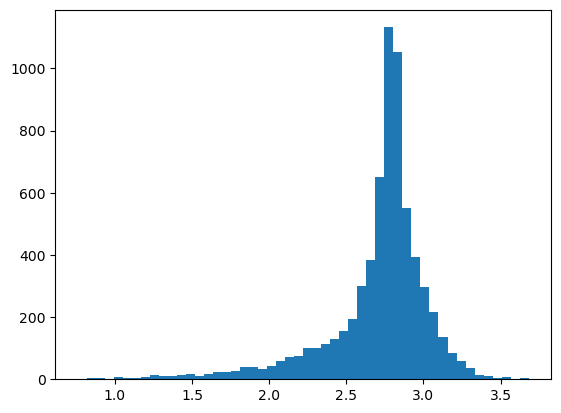

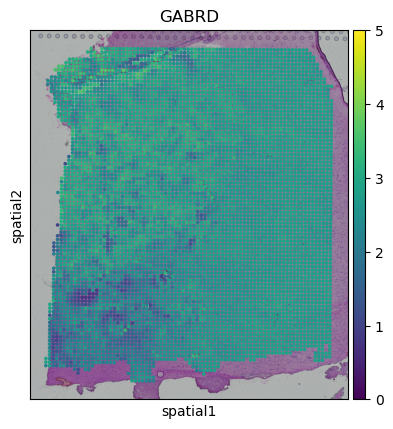

In [7]:
gene_name = "GABRD" 
adata = super_adata[super_adata.obs['in_tissue']==1]
# adata = super_adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=2000)
plt.hist(adata[:, gene_name].X.toarray().flatten(), bins=50)
plt.show()
sc.pl.spatial(
    adata,
    color=gene_name,
    vmin=0,   # 最小值
    vmax=5,   # 最大值
    color_map="viridis"
)

/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


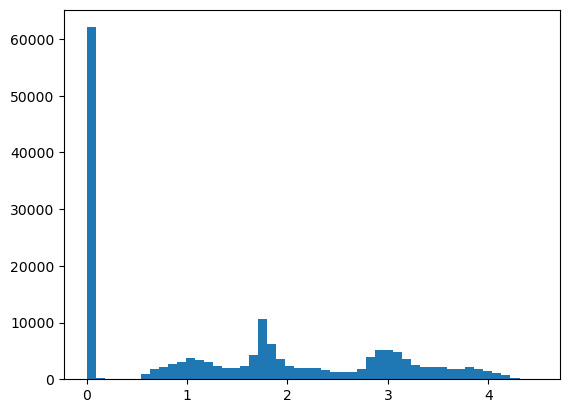

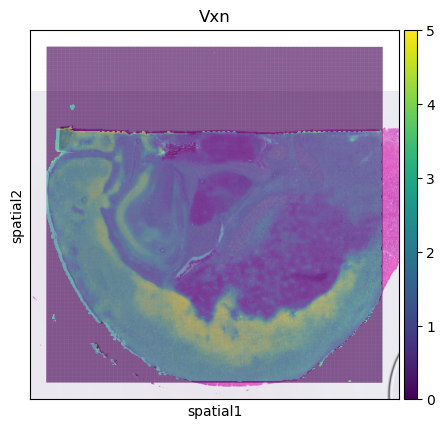

In [55]:
gene_name = "Vxn" 
# adata = super_adata[super_adata.obs['in_tissue']==1]
adata = super_adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=2000)
plt.hist(adata[:, gene_name].X.toarray().flatten(), bins=50)
plt.show()
sc.pl.spatial(
    adata,
    color=gene_name,
    vmin=0,   # 最小值
    vmax=5,   # 最大值
    color_map="viridis"
)

/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


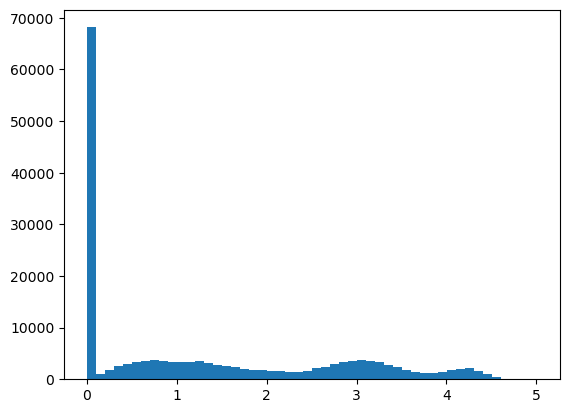

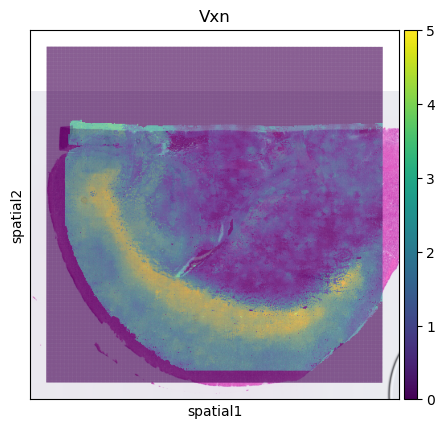

In [52]:
gene_name = "Vxn" 
# adata = super_adata[super_adata.obs['in_tissue']==1]
adata = super_adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata,n_top_genes=2000)
plt.hist(adata[:, gene_name].X.toarray().flatten(), bins=50)
plt.show()
sc.pl.spatial(
    adata,
    color=gene_name,
    vmin=0,   # 最小值
    vmax=5,   # 最大值
    color_map="viridis"
)

/home/yiriso/anaconda3/envs/DataReader/lib/python3.10/site-packages/scanpy/preprocessing/_normalization.py:234: UserWarning: Some cells have zero counts
  warn(UserWarning("Some cells have zero counts"))


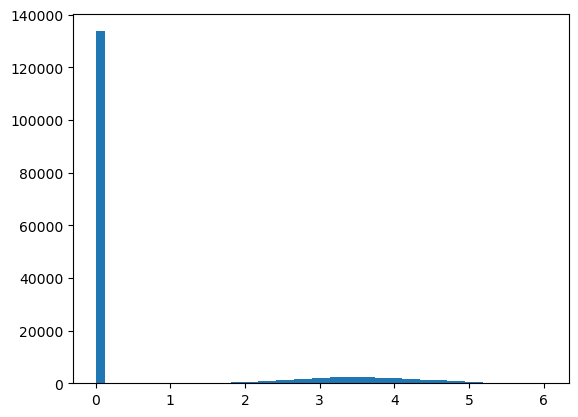

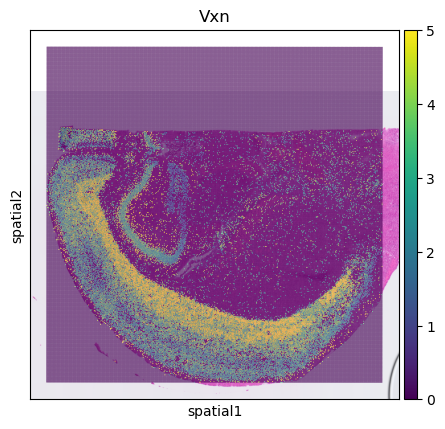

In [53]:
gene_name = "Vxn"  # 替换为你要可视化的基因名
adata = raw_adata[raw_adata.obs['in_tissue']==1]
adata = raw_adata
sc.pp.normalize_total(adata, target_sum=1e4)
sc.pp.log1p(adata)
plt.hist(adata[:, gene_name].X.toarray().flatten(), bins=50)
plt.show()
sc.pl.spatial(
    adata,
    color=gene_name,
    vmin=0,   # 最小值
    vmax=5,   # 最大值
    color_map="viridis"
)